## Home work 6
Name : Ramya Gopinath

USC ID : 4595082262

Github username : ramyagopinath08

In [54]:
#import statements
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt

#imputation techniques import statements
from sklearn.impute import SimpleImputer

#import statements for random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#import statements for cross validation and XGboost
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold,StratifiedKFold,GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBClassifier,cv

#SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

In [55]:
import warnings

warnings.filterwarnings("ignore")

## Tree Based Method

**1(a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test
set. The training set contains 60,000 rows, of which 1,000 belong to the positive
class and 171 columns, of which one is the class column. All attributes are numeric.**


In [56]:
#reading the train data
data_frame_train = pd.read_csv('../Data/aps_failure_training_set.csv', skiprows=20, na_values="na")
column_names_train = list(data_frame_train)
data_frame_train.head()

class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   neg   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1   neg   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0     0.0   
2   neg   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3   neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4   neg   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0     0.0   

   ag_002  ...     ee_002    ee_003    ee_004    ee_005    ee_006    ee_007  \
0     0.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.0  157956.0   
1     0.0  ...   421400.0  178064.0  293306.0  245416.0  133654.0   81140.0   
2     0.0  ...   277378.0  159812.0  423992.0  409564.0  320746.0  158022.0   
3     0.0  ...      240.0      46.0      58.0      44.0      10.0       0.0   
4     0.0  ...   622012.0  229790.0  405298.0  347188.0  286954.0  311560.0   

     ee_008  ee_009  ef_000  eg_000  
0   73224.0     0.0     0.0     0.0  
1   97576.0  1500.0     0.0     0.0  
2   95128.0   514.0     0.0     0.0  
3       0.0     0.0     4.0    32.0  
4  433954.0  1218.0     0.0     0.0  

[5 rows x 171 columns]

**1(b) Data Preparation
This data set has missing values. When the number of data with missing values
is significant, discarding them is not a good idea.**

In [57]:
#Assigning class values as pos=1 and neg=0
data_frame_train["class type"] = np.where(data_frame_train["class"] == "pos", 1, 0)

first_column = data_frame_train.pop('class type')
data_frame_train.insert(0, 'class type', first_column)

data_frame_train = data_frame_train.drop(['class'],axis=1)
data_frame_train = data_frame_train.rename(columns={"class type":"class"})
data_frame_train.head()

class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0      0   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0   
1      0   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0   
2      0   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0   
3      0      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4      0   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0   

   ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee_005    ee_006  \
0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.0   
1     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0  133654.0   
2     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0  320746.0   
3     0.0     0.0  ...      240.0      46.0      58.0      44.0      10.0   
4     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0  286954.0   

     ee_007    ee_008  ee_009  ef_000  eg_000  
0  157956.0   73224.0     0.0     0.0     0.0  
1   81140.0   97576.0  1500.0     0.0     0.0  
2  158022.0   95128.0   514.0     0.0     0.0  
3       0.0       0.0     0.0     4.0    32.0  
4  311560.0  433954.0  1218.0     0.0     0.0  

[5 rows x 171 columns]

**1(b)i. Research what types of techniques are usually used for dealing with data with
missing values.2 Pick at least one of them and apply it to this data in the
next steps.**

The different imputation techniques are :

1) Univariate imputation <br>
2) Multivariate imputation

Univariate imputation uses the SimpleImputer class for imputing missing values. The missing values are imputed with the values provided using statistical methods such as mean,median or most frequent of each column where the data is missing. 

Multivarient imputation uses the IterativeImputer class for imputing the missing values. Each feature is modeled as a missing values as a function of other features and use estimator to impute the values. It does it in form of round robin fashion. At each step, a feature column is treated as a output column "y" and the rest are treated as inputs "x". This is repeated for maximum iteration specified with max_iter value.

Another type of imputation is Nearest Neighbour imputation. This is called a KNNImputer. This uses the euclidean distance matrix to compute the missing values. The n_neighbors feature is used to impute the missing values. 

In [58]:
#SimpleImputer method using mean value strategy on train data
imputation_train = SimpleImputer(strategy="mean")
imputation_train.fit(data_frame_train)

imputed_train = imputation_train.transform(data_frame_train)
imputed_train = pd.DataFrame(imputed_train, columns=column_names_train)
imputed_train.head()

class   aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0    0.0  76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0   
1    0.0  33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2    0.0  41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0   
3    0.0     12.0  0.000000  7.000000e+01      66.000000     0.0    10.0   
4    0.0  60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0   

   ag_000  ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee_005  \
0     0.0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0   
1     0.0     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0   
2     0.0     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0   
3     0.0     0.0     0.0  ...      240.0      46.0      58.0      44.0   
4     0.0     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0   

     ee_006    ee_007    ee_008  ee_009  ef_000  eg_000  
0  339156.0  157956.0   73224.0     0.0     0.0     0.0  
1  133654.0   81140.0   97576.0  1500.0     0.0     0.0  
2  320746.0  158022.0   95128.0   514.0     0.0     0.0  
3      10.0       0.0       0.0     0.0     4.0    32.0  
4  286954.0  311560.0  433954.0  1218.0     0.0     0.0  

[5 rows x 171 columns]

In [59]:
#reading the test data set
data_frame_test = pd.read_csv('../Data/aps_failure_test_set.csv', skiprows=20, na_values="na")
column_names_test = list(data_frame_test)
data_frame_test.head()

class  aa_000  ab_000  ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   neg      60     0.0    20.0    12.0     0.0     0.0     0.0     0.0   
1   neg      82     0.0    68.0    40.0     0.0     0.0     0.0     0.0   
2   neg   66002     2.0   212.0   112.0     0.0     0.0     0.0     0.0   
3   neg   59816     NaN  1010.0   936.0     0.0     0.0     0.0     0.0   
4   neg    1814     NaN   156.0   140.0     0.0     0.0     0.0     0.0   

   ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_006    ee_007  \
0     0.0  ...    1098.0     138.0     412.0     654.0       78.0      88.0   
1     0.0  ...    1068.0     276.0    1620.0     116.0       86.0     462.0   
2     0.0  ...  495076.0  380368.0  440134.0  269556.0  1315022.0  153680.0   
3     0.0  ...  540820.0  243270.0  483302.0  485332.0   431376.0  210074.0   
4     0.0  ...    7646.0    4144.0   18466.0   49782.0     3176.0     482.0   

     ee_008  ee_009  ef_000  eg_000  
0       0.0     0.0     0.0     0.0  
1       0.0     0.0     0.0     0.0  
2     516.0     0.0     0.0     0.0  
3  281662.0  3232.0     0.0     0.0  
4      76.0     0.0     0.0     0.0  

[5 rows x 171 columns]

In [60]:
#data preparation for test data set
data_frame_test["class type"] = np.where(data_frame_test["class"] == "pos", 1, 0)

first_column = data_frame_test.pop('class type')
data_frame_test.insert(0, 'class type', first_column)

data_frame_test = data_frame_test.drop(['class'],axis=1)
data_frame_test = data_frame_test.rename(columns={"class type":"class"})
data_frame_test.head()

class  aa_000  ab_000  ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0      0      60     0.0    20.0    12.0     0.0     0.0     0.0     0.0   
1      0      82     0.0    68.0    40.0     0.0     0.0     0.0     0.0   
2      0   66002     2.0   212.0   112.0     0.0     0.0     0.0     0.0   
3      0   59816     NaN  1010.0   936.0     0.0     0.0     0.0     0.0   
4      0    1814     NaN   156.0   140.0     0.0     0.0     0.0     0.0   

   ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_006    ee_007  \
0     0.0  ...    1098.0     138.0     412.0     654.0       78.0      88.0   
1     0.0  ...    1068.0     276.0    1620.0     116.0       86.0     462.0   
2     0.0  ...  495076.0  380368.0  440134.0  269556.0  1315022.0  153680.0   
3     0.0  ...  540820.0  243270.0  483302.0  485332.0   431376.0  210074.0   
4     0.0  ...    7646.0    4144.0   18466.0   49782.0     3176.0     482.0   

     ee_008  ee_009  ef_000  eg_000  
0       0.0     0.0     0.0     0.0  
1       0.0     0.0     0.0     0.0  
2     516.0     0.0     0.0     0.0  
3  281662.0  3232.0     0.0     0.0  
4      76.0     0.0     0.0     0.0  

[5 rows x 171 columns]

In [61]:
#imputation of the test data
imputed_test = imputation_train.transform(data_frame_test)
imputed_test = pd.DataFrame(imputed_test, columns=column_names_test)
imputed_test.head()

class   aa_000    ab_000  ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0    0.0     60.0  0.000000    20.0    12.0     0.0     0.0     0.0     0.0   
1    0.0     82.0  0.000000    68.0    40.0     0.0     0.0     0.0     0.0   
2    0.0  66002.0  2.000000   212.0   112.0     0.0     0.0     0.0     0.0   
3    0.0  59816.0  0.713189  1010.0   936.0     0.0     0.0     0.0     0.0   
4    0.0   1814.0  0.713189   156.0   140.0     0.0     0.0     0.0     0.0   

   ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_006    ee_007  \
0     0.0  ...    1098.0     138.0     412.0     654.0       78.0      88.0   
1     0.0  ...    1068.0     276.0    1620.0     116.0       86.0     462.0   
2     0.0  ...  495076.0  380368.0  440134.0  269556.0  1315022.0  153680.0   
3     0.0  ...  540820.0  243270.0  483302.0  485332.0   431376.0  210074.0   
4     0.0  ...    7646.0    4144.0   18466.0   49782.0     3176.0     482.0   

     ee_008  ee_009  ef_000  eg_000  
0       0.0     0.0     0.0     0.0  
1       0.0     0.0     0.0     0.0  
2     516.0     0.0     0.0     0.0  
3  281662.0  3232.0     0.0     0.0  
4      76.0     0.0     0.0     0.0  

[5 rows x 171 columns]

In [62]:
#combining the train and test data set
frames = [imputed_train,imputed_test]
combine_dataframe = pd.concat(frames,ignore_index=True)
combine_dataframe.head()

class   aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0    0.0  76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0   
1    0.0  33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2    0.0  41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0   
3    0.0     12.0  0.000000  7.000000e+01      66.000000     0.0    10.0   
4    0.0  60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0   

   ag_000  ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee_005  \
0     0.0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0   
1     0.0     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0   
2     0.0     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0   
3     0.0     0.0     0.0  ...      240.0      46.0      58.0      44.0   
4     0.0     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0   

     ee_006    ee_007    ee_008  ee_009  ef_000  eg_000  
0  339156.0  157956.0   73224.0     0.0     0.0     0.0  
1  133654.0   81140.0   97576.0  1500.0     0.0     0.0  
2  320746.0  158022.0   95128.0   514.0     0.0     0.0  
3      10.0       0.0       0.0     0.0     4.0    32.0  
4  286954.0  311560.0  433954.0  1218.0     0.0     0.0  

[5 rows x 171 columns]

**1(b)ii. For each of the 170 features, calculate the coefficient of variation CV =s/m,where s is sample standard deviation and m is sample mean.**

In [63]:
#Calculating the CV value for each of the features
cv = lambda x: np.std(x) / np.mean(x)
calculated_CV = combine_dataframe.iloc[:,1:].apply(cv)
calculated_CV

aa_000      4.328579
ab_000      2.207337
ac_000      2.167784
ad_000    193.954031
ae_000     22.282116
             ...    
ee_007      4.885271
ee_008      3.335331
ee_009      5.754175
ef_000     47.780793
eg_000     45.710829
Length: 170, dtype: float64

**1(b)iii. Plot a correlation matrix for your features using pandas or any other tool.**

In [64]:
corr = combine_dataframe.iloc[:,1:].corr()
corr.style.background_gradient(cmap='coolwarm')

**1(b)iv. Pick √170 features with highest CV , and make scatter plots and box plots
for them, similar to those on p. 129 of ISLR. Can you draw conclusions about
significance of those features, just by the scatter plots? This does not mean
that you will only use those features in the following questions. We picked
them only for visualization.**


In [65]:
#Picking the top 13 features after calculating the CV value
feature_pick = math.floor(math.sqrt(170))
CV_highest_features = calculated_CV.sort_values(ascending=False)[:feature_pick]
CV_highest_features = pd.DataFrame(CV_highest_features, columns= ["CV values"])
CV_highest_features

CV values
cf_000  194.437044
co_000  194.087891
ad_000  193.954031
cs_009  193.043765
dj_000  120.084110
df_000  116.137408
as_000  114.463628
dh_000  111.945660
ag_000   91.350686
au_000   86.293013
ak_000   78.559476
az_009   77.894012
ay_009   77.457251

In [66]:
#sampling the data to disply a scatter plot
df = combine_dataframe[CV_highest_features.index]
selected_col = combine_dataframe[["class"]]
df = df.join(selected_col)
df = df.sample(n=47000)
df.head()

cf_000  co_000  ad_000  cs_009  dj_000  df_000  as_000  dh_000  ag_000  \
20650     0.0     0.0   178.0     0.0     0.0     0.0     0.0     0.0     0.0   
29184     0.0   350.0    98.0     0.0     0.0     0.0     0.0     0.0     0.0   
72421     2.0   758.0   234.0     0.0     0.0     0.0     0.0     0.0     0.0   
68472     6.0     0.0   142.0     0.0     0.0     0.0     0.0     0.0     0.0   
36061     4.0    16.0   196.0     0.0     0.0     0.0     0.0     0.0     0.0   

       au_000  ak_000  az_009  ay_009  class  
20650     0.0     0.0     0.0     0.0    0.0  
29184     0.0     0.0     0.0     0.0    0.0  
72421     0.0     0.0     0.0     0.0    0.0  
68472     0.0     0.0     0.0     0.0    0.0  
36061     0.0     0.0     0.0     0.0    0.0

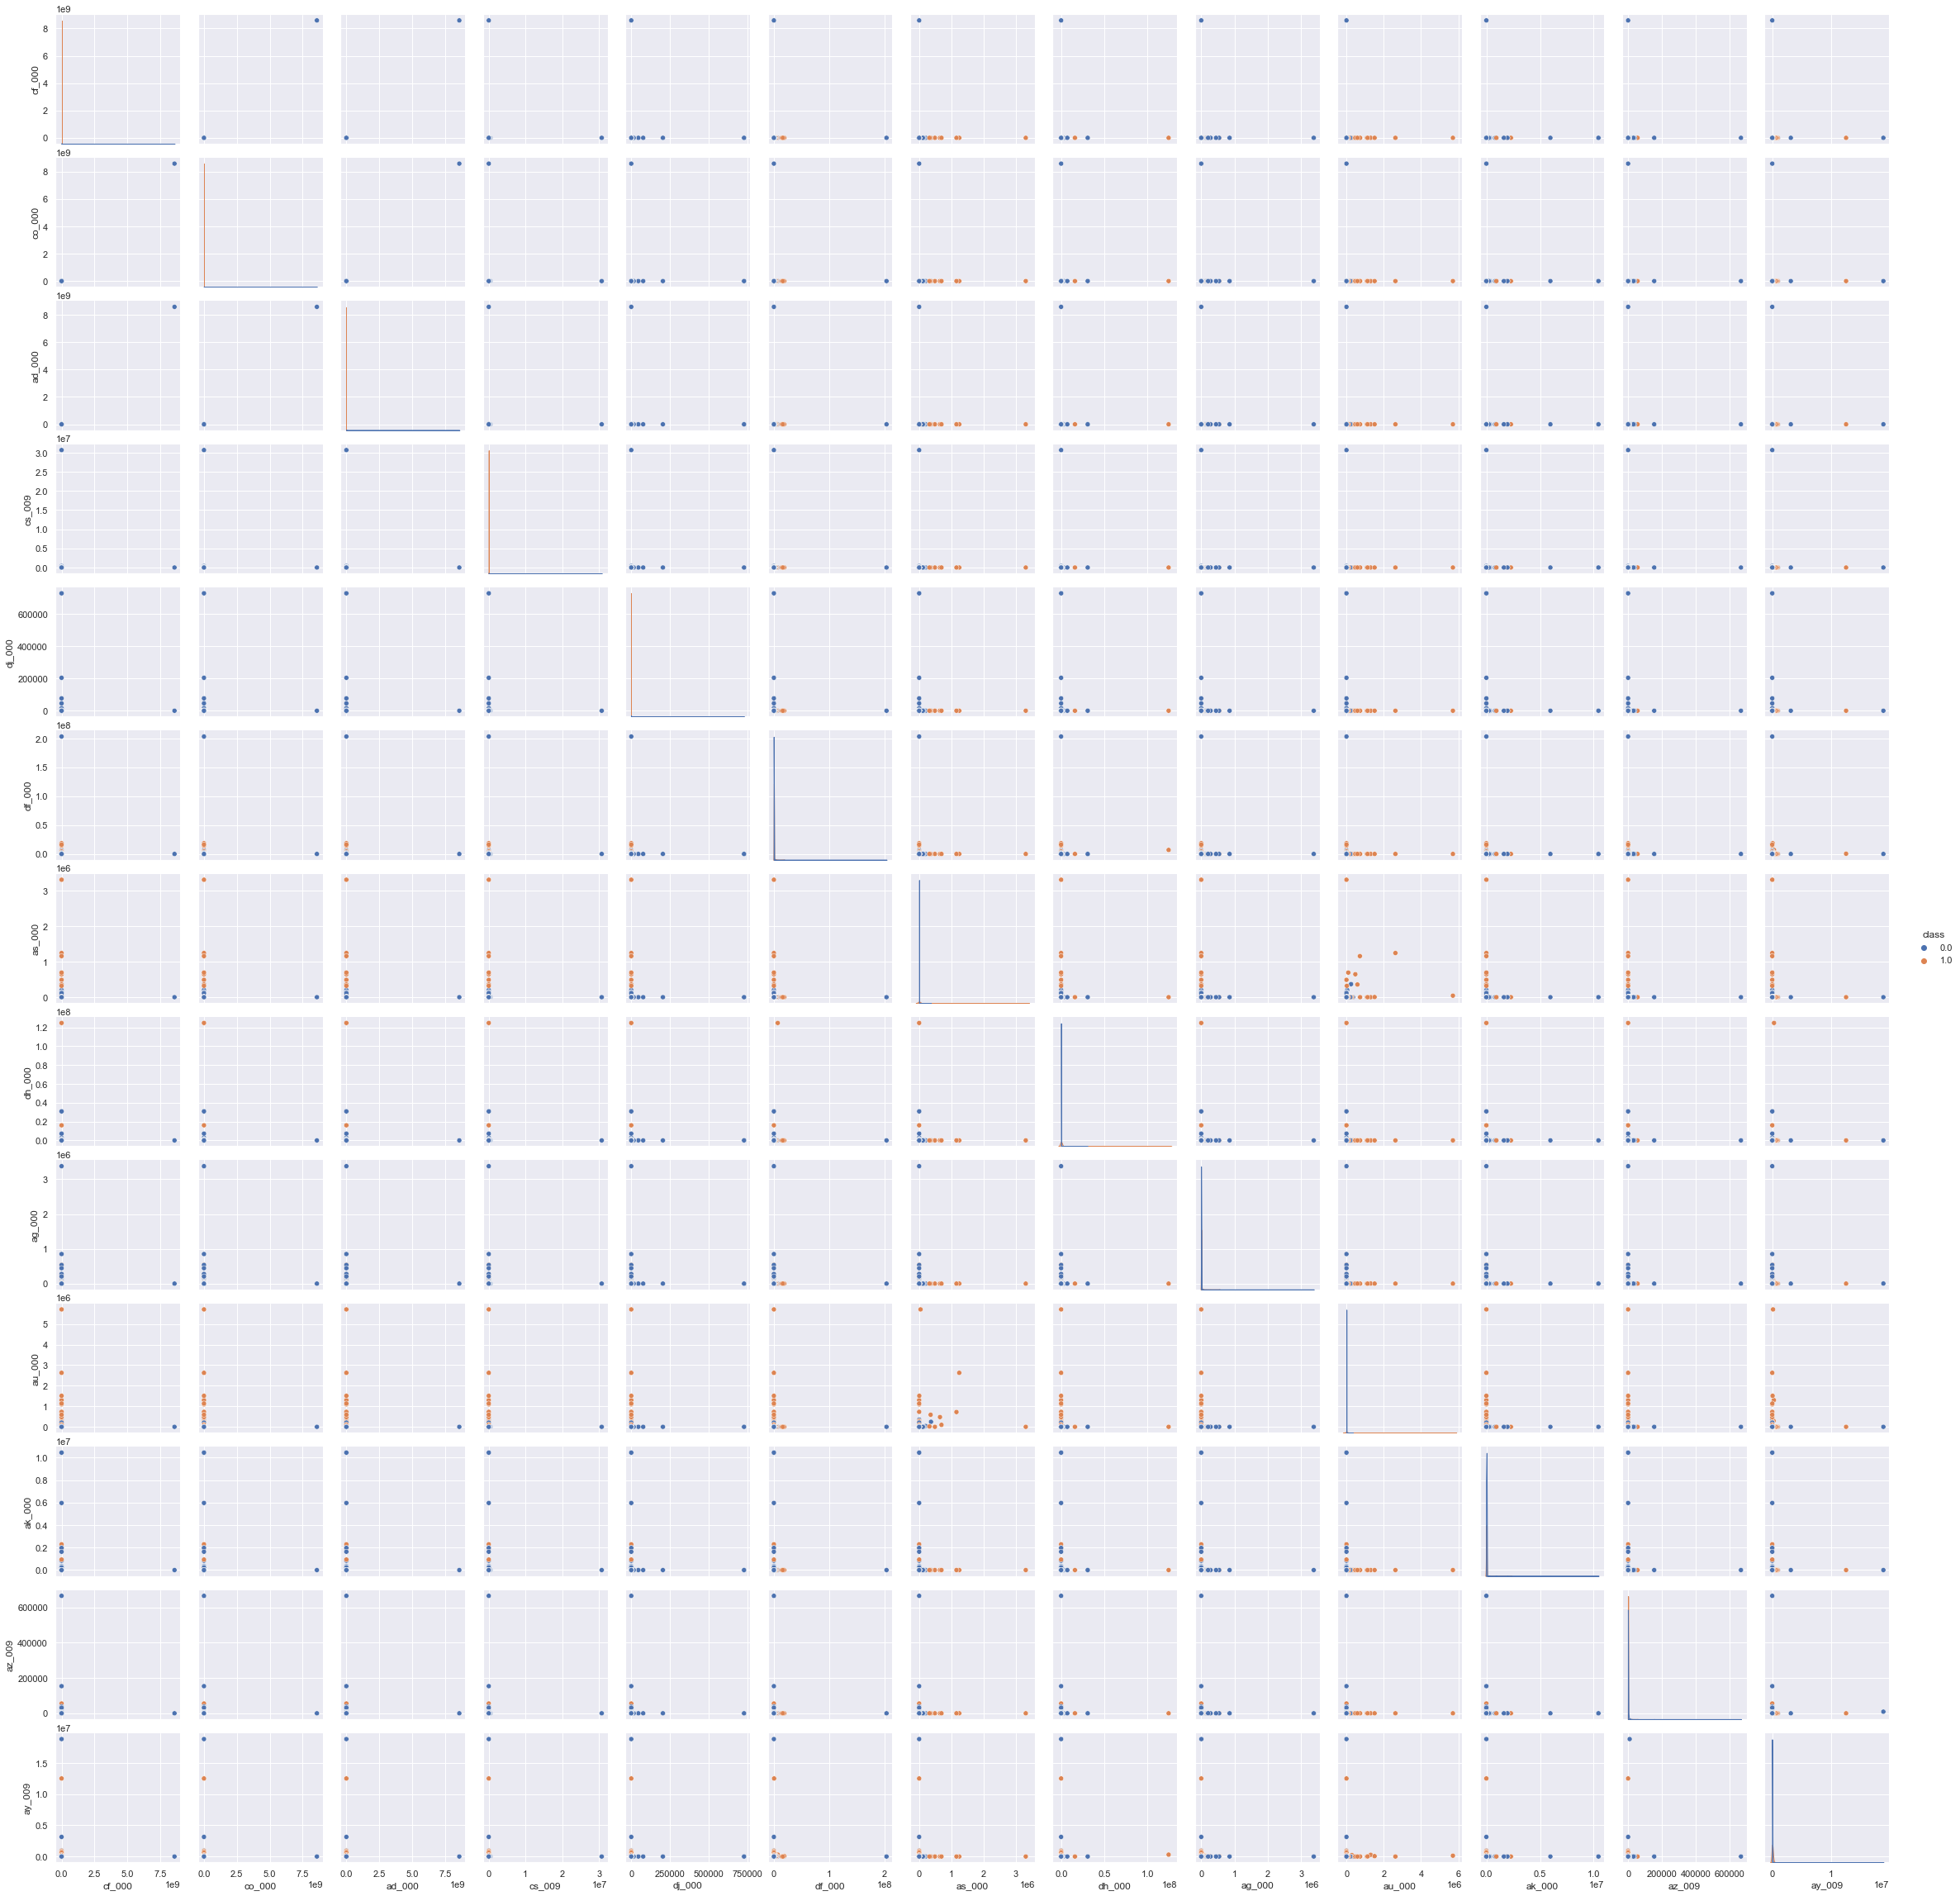

In [67]:
#Pair plot for the top features obtained
sns.set_theme()
sns.pairplot(df,hue="class")

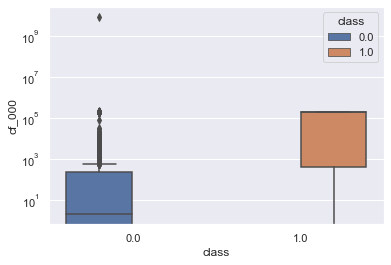

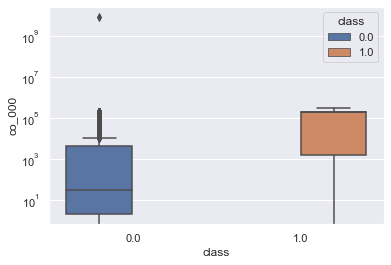

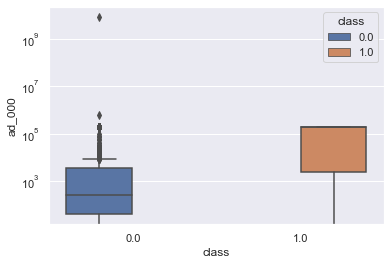

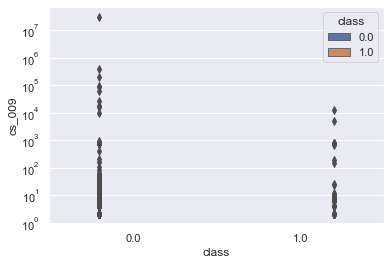

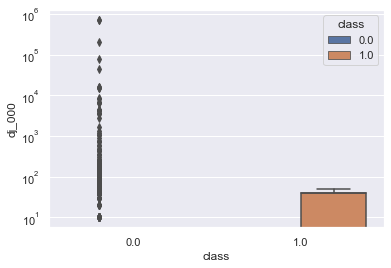

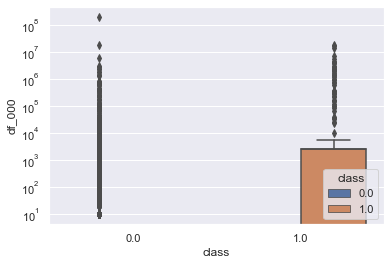

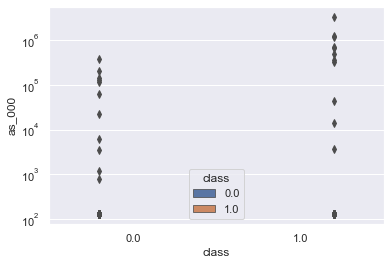

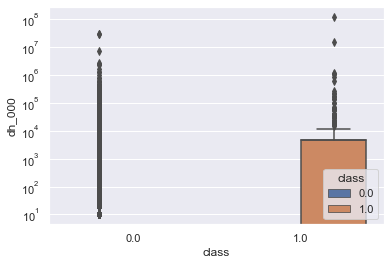

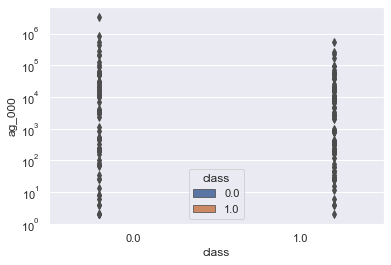

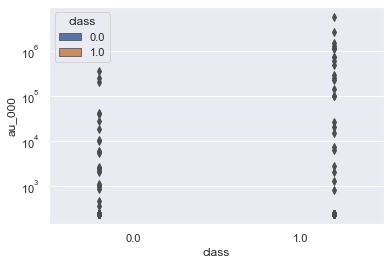

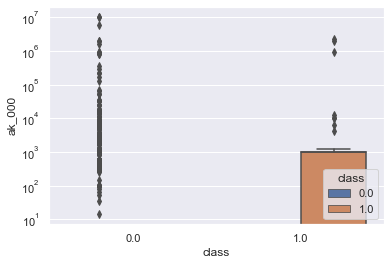

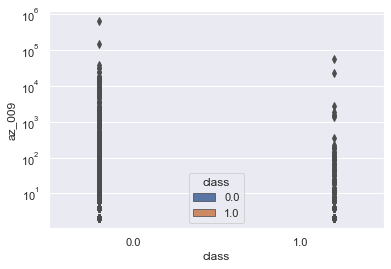

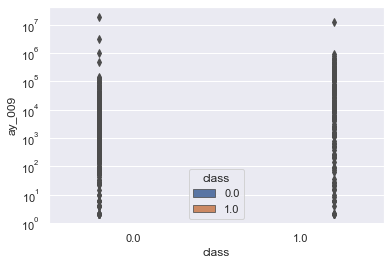

In [68]:
#Box plots for the top features obtained 
for i in df.iloc[:,:13]:
    sns.boxplot(x = "class", hue="class", y= i , data=df)
    plt.yscale("log")
    plt.show()

**v. Determine the number of positive and negative data. Is this data set imbalanced?**

In [69]:
combine_dataframe["class"].value_counts()

0.0    74625
1.0     1375
Name: class, dtype: int64

From the above we can conclude that there is an imbalance in the data set 

**(c) Train a random forest to classify the data set. Do NOT compensate for class
imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and
misclassification for training and test sets and report them (You may use pROC
package). Calculate Out of Bag error estimate for your random forset and compare
it to the test error.**

In [70]:
#dividing the data into x train, y train and x test and y test
x_train = imputed_train.iloc[:,1:]
y_train = imputed_train.iloc[:,:1]

x_test = imputed_test.iloc[:,1:]
y_test = imputed_test.iloc[:,:1]

Confusion matrix for train dataset: 
 [[59000     0]
 [    0  1000]]
AUC score for train dataset: 1.0
Misclassification F1-score for Train data is : 1.0
The out of bag score for data : 0.9937


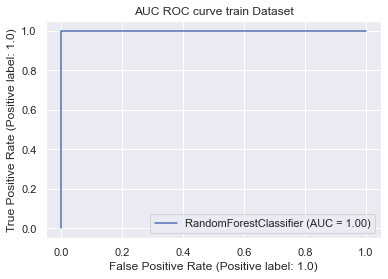

In [71]:
#using Random forest classifier without compensating for class imbalance in the data set
random_forest = RandomForestClassifier(oob_score=True)
random_forest.fit(x_train,y_train.values.ravel())

y_predict_train = random_forest.predict(x_train)

#confusion matrix
confusionTrain_matrix = confusion_matrix(y_train,y_predict_train)
print(f"Confusion matrix for train dataset: \n {confusionTrain_matrix}")

#AUC ROC score
auc_score_train = roc_auc_score(y_train,y_predict_train)
print(f"AUC score for train dataset: {auc_score_train}")

#f1 score for the train data 
f1_score_train = f1_score(y_train,y_predict_train)
print(f"Misclassification F1-score for Train data is : {f1_score_train}")

#out of bag error for train data
print(f"The out of bag score for data : {random_forest.oob_score_}")

#plotting the curve
plot_roc_curve(random_forest,x_train,y_train)
plt.title("AUC ROC curve train Dataset")
plt.show()

In [72]:
comparision_RandomForest = pd.DataFrame(columns=["Training error","Testing error"])

comparision_RandomForest.loc["Imbalanced","Training error"] = f1_score_train

Confusion matrix for test dataset: 
 [[15609    16]
 [  103   272]]
AUC score for test dataset: 0.8621546666666667
Misclassification F1-score for Test data is : 0.8205128205128206


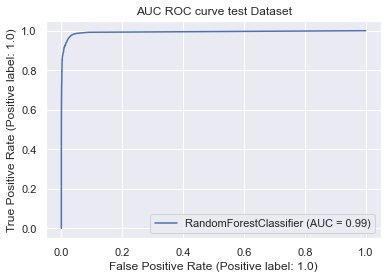

In [73]:
#prediction on the test set
y_predict_test = random_forest.predict(x_test)

#confusion matrix
confusionTest_matrix = confusion_matrix(y_test,y_predict_test)
print(f"Confusion matrix for test dataset: \n {confusionTest_matrix}")

#AUC ROC score
auc_score_test = roc_auc_score(y_test,y_predict_test)
print(f"AUC score for test dataset: {auc_score_test}")

#f1 score for the test data
f1_score_test = f1_score(y_test,y_predict_test)
print(f"Misclassification F1-score for Test data is : {f1_score_test}")

#plotting the curve
plot_roc_curve(random_forest,x_test,y_test)
plt.title("AUC ROC curve test Dataset")
plt.show()

In [74]:
comparision_RandomForest.loc["Imbalanced","Testing error"] = f1_score_test

comparision_RandomForest

Training error Testing error
Imbalanced            1.0      0.820513

From the above, we can conculde that the Random Forest Classifier is overfitting to the training data and not performing well on the test data. This might be due to the imbalance in the data.

**1(d) Research how class imbalance is addressed in random forests. Compensate for
class imbalance in your random forest and repeat 2c. Compare the results with
those of 2c.**

In random forests, imbalance in data can be delt with sampling techniques. The following two mentods can be used:<br>
(1) Oversampling - over representation of minority class<br>
(2) Undersampling: under representation of majority class

Confusion matrix for train dataset: 
 [[59000     0]
 [    0  1000]]
AUC score for train dataset: 1.0
Misclassification F1-score for Train data is : 1.0
The out of bag score for balanced data : 0.9921833333333333


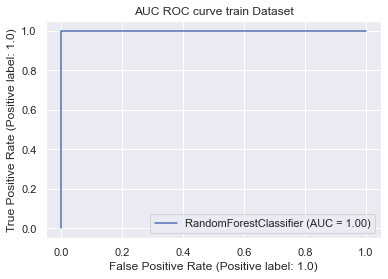

In [75]:
#Random forest classifer with class weight balanced
random_forest_balanced = RandomForestClassifier(oob_score=True, class_weight="balanced")
random_forest_balanced.fit(x_train,y_train.values.ravel())

#predicting on the balanced data set for train
y_predict_train_Balanced = random_forest_balanced.predict(x_train)

#confusion matrix
confusionTrain_matrix_Balanced = confusion_matrix(y_train,y_predict_train_Balanced)
print(f"Confusion matrix for train dataset: \n {confusionTrain_matrix_Balanced}")

#AUC ROC score
auc_score_train_Balanced = roc_auc_score(y_train,y_predict_train_Balanced)
print(f"AUC score for train dataset: {auc_score_train_Balanced}")

#f1 score for the train data
f1_score_balanced = f1_score(y_train,y_predict_train_Balanced)
print(f"Misclassification F1-score for Train data is : {f1_score_balanced}")

#out of bag error for train data
print(f"The out of bag score for balanced data : {random_forest_balanced.oob_score_}")

#plotting the curve
plot_roc_curve(random_forest_balanced,x_train,y_train)
plt.title("AUC ROC curve train Dataset")
plt.show()

In [76]:
comparision_RandomForest.loc["Balanced","Training error"] = f1_score_balanced

Confusion matrix for train dataset: 
 [[15612    13]
 [  161   214]]
AUC score for train dataset: 0.7849173333333332
Misclassification F1-score for Train data is : 0.7109634551495018


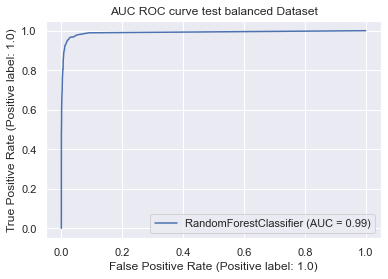

In [77]:
#predict on the balanced data for test data
y_predict_test_Balanced = random_forest_balanced.predict(x_test)

#confusion matrix
confusionTest_matrix_Balanced = confusion_matrix(y_test,y_predict_test_Balanced)
print(f"Confusion matrix for train dataset: \n {confusionTest_matrix_Balanced}")

#AUC ROC score
auc_score_test_Balanced = roc_auc_score(y_test,y_predict_test_Balanced)
print(f"AUC score for train dataset: {auc_score_test_Balanced}")

#f1 score for the test data
f1_score_balanced_test = f1_score(y_test,y_predict_test_Balanced)
print(f"Misclassification F1-score for Train data is : {f1_score_balanced_test}")

#plotting the curve
plot_roc_curve(random_forest_balanced,x_test,y_test)
plt.title("AUC ROC curve test balanced Dataset")
plt.show()

In [78]:
comparision_RandomForest.loc["Balanced","Testing error"] = f1_score_balanced_test

comparision_RandomForest

Training error Testing error
Imbalanced            1.0      0.820513
Balanced              1.0      0.710963

The above table shows the comparision with the train and test errors for the imbalanced and balanced data while using Random Forest Classifier.

**1(e) XGBoost and Model Trees<br><br>
In the case of a univariate tree, only one input dimension is used at a tree split.
In a multivariate tree, or model tree, at a decision node all input dimensions can
be used and thus it is more general. In univariate classification trees, majority
polling is used at each node to determine the split of that node as the decision
rule. In model trees, a (linear) model that relies on all of the variables is used
to determine the split of that node (i.e. instead of using Xj > s as the decision
rule, one has P
j
βjXj > s. as the decision rule). Alternatively, in a regression
tree, instead of using average in the region associated with each node, a linear
regression model is used to determine the value associated with that node.
<br><br>
One of the methods that can be used at each node is Logistic Regression. Because
the number of variables is large in this problem, one can use L1-penalized logistic
regression at each node. You can use XGBoost to fit the model tree. Determine
α (the regularization term) using cross-validation. Train the model for the APS
data set without compensation for class imbalance. Use one of 5 fold, 10 fold,
and leave-one-out cross validation methods to estimate the error of your trained
model and compare it with the test error. Report the Confusion Matrix, ROC,
and AUC for training and test sets.**

In [79]:
#sampling the data to get the best alpha
imputed_train_sampled = imputed_train.sample(n=50000)
x_train_sampled_new = imputed_train_sampled.iloc[:,1:]
y_train_sampled_new = imputed_train_sampled.iloc[:,:1]

In [80]:
#XGBoost classifier using cross validation to select the best alpha
list_of_mse = []
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
for alpha in range(0,6):
    xgboost_classifier = XGBClassifier(objective ='binary:logistic', reg_alpha = alpha, n_estimators = 10, n_jobs=10, 
                            use_label_encoder= False, eval_metric = "logloss")
    score = -1 * model_selection.cross_val_score(xgboost_classifier, X = x_train_sampled_new ,y = y_train_sampled_new.values.ravel(),
                                                 cv=cv,scoring='neg_mean_squared_error').mean()
    list_of_mse.append(score)

The best alpha value for L1 regularization: 1


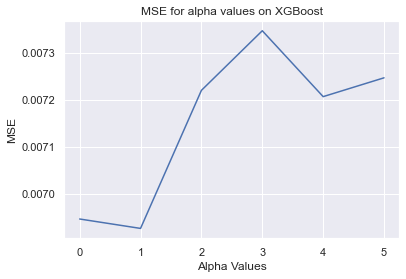

In [81]:
#The plot that displays the alpha values and its MSE
best_alpha = list_of_mse.index(min(list_of_mse))

print(f"The best alpha value for L1 regularization: {best_alpha}")
plt.plot(list_of_mse)
plt.xlabel("Alpha Values")
plt.ylabel("MSE")
plt.title("MSE for alpha values on XGBoost")
plt.show()

[0]	validation_0-logloss:0.44376
[1]	validation_0-logloss:0.30578
[2]	validation_0-logloss:0.21848
[3]	validation_0-logloss:0.15996
[4]	validation_0-logloss:0.11939
[5]	validation_0-logloss:0.09049
[6]	validation_0-logloss:0.06971
[7]	validation_0-logloss:0.05459
[8]	validation_0-logloss:0.04336
[9]	validation_0-logloss:0.03482
Confusion Matrix: 
 [[58981    19]
 [  199   801]]
AUC score for Train data on XG Boost: 0.9003389830508475


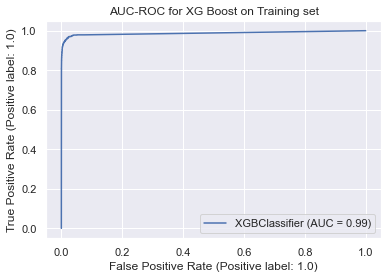

In [82]:
#XGBoost classifier using the best alpha value obtained
xgboost_classifier_best = XGBClassifier(objective ='binary:logistic', reg_alpha = best_alpha, n_estimators = 10,
                                        n_jobs=10,eval_metric="logloss", use_label_encoder= False, verbosity = 0)
xgboost_classifier_best.fit(x_train,y_train, eval_set = [(x_train,y_train)])

# Get Confusion matrix, ROC, AUC for training set
y_pred = xgboost_classifier_best.predict(x_train)
conf_matrix = confusion_matrix(y_train,y_pred)
print(f"Confusion Matrix: \n {conf_matrix}")

auc_score_train = roc_auc_score(y_train,y_pred)
print(f"AUC score for Train data on XG Boost: {auc_score_train}")

plot_roc_curve(xgboost_classifier_best,x_train,y_train)
plt.title("AUC-ROC for XG Boost on Training set")
plt.show()

In [83]:
comparision_XGBoost = pd.DataFrame(columns=["Training error","Testing error"])

comparision_XGBoost.loc["Imbalanced XGBoost","Training error"] = auc_score_train

Confusion Matrix: 
 [[15600    25]
 [  110   265]]
AUC score for Test data on XG Boost: 0.8525333333333333


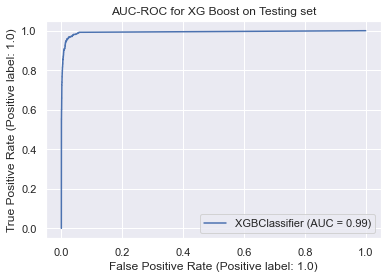

In [84]:
#predict on the test data
y_pred = xgboost_classifier_best.predict(x_test)

#confusion matrix, auc,roc score
conf_matrix = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix: \n {conf_matrix}")

auc_score_test = roc_auc_score(y_test,y_pred)
print(f"AUC score for Test data on XG Boost: {auc_score_test}")

plot_roc_curve(xgboost_classifier_best,x_test,y_test)
plt.title("AUC-ROC for XG Boost on Testing set")
plt.show()

In [85]:
comparision_XGBoost.loc["Imbalanced XGBoost","Testing error"] = auc_score_test

**1(f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your
data to compensate for class imbalance. Train XGBosst with L1-penalized logistic regression at each node using the pre-processed data and repeat 2e. Do not
forget that there is a right and a wrong way of cross validation here. Compare
the uncompensated case with SMOTE case.**

In [86]:
#Implementing SMOTE and the XGBClassifier using a pipeline 
#The pipeline is sent to the GridSearchCV to find the best alpha
pipeline = imbpipeline(steps = [['smote', SMOTE()],
                                ['classifier', XGBClassifier(objective ='binary:logistic', n_estimators = 10, n_jobs=10, 
                                                             use_label_encoder= False) ]])

stratified_kfold = StratifiedKFold(n_splits=3,shuffle=True)

param_grid = {'classifier__reg_alpha':[0,1,2,3,4,5]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold)

grid_search.fit(x_train, y_train.values.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[['smote', SMOTE()],
                                       ['classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_...
                                                    

In [87]:
grid_search.best_estimator_

Pipeline(steps=[('smote', SMOTE()),
                ['classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=10,
                               n_jobs=10, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=5, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', use_label_encoder=False,
                               validate_parameters=1, verbosity

The best alpha score is : 5
Confusion Matrix: 
 [[58067   933]
 [  467 58533]]
Cross Validation score for Train data on XG Boost: 0.9837440876321043


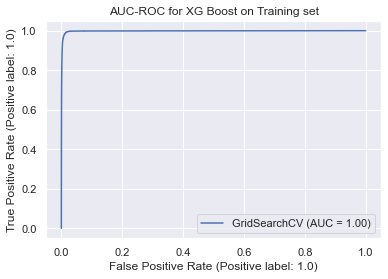

In [88]:
#Predicting on the train set using the best estimated model
sm = SMOTE()
sampledX_train_new, sampledY_train_new = sm.fit_resample(x_train,y_train)

print(f"The best alpha score is : {grid_search.best_params_['classifier__reg_alpha']}")

y_pred_train_smote = grid_search.predict(sampledX_train_new)

#confusion matrix
conf_matrix_smote = confusion_matrix(sampledY_train_new,y_pred_train_smote)
print(f"Confusion Matrix: \n {conf_matrix_smote}")

#cross validation score 
crossvalidation_train = grid_search.best_score_
print(f"Cross Validation score for Train data on XG Boost: {crossvalidation_train}")

plot_roc_curve(grid_search,sampledX_train_new,sampledY_train_new)
plt.title("AUC-ROC for XG Boost on Training set")
plt.show()

In [89]:
comparision_XGBoost.loc["SMOTE","Training error"] = crossvalidation_train

Confusion Matrix: 
 [[15354   271]
 [   40   335]]
Test Score : 0.990655488


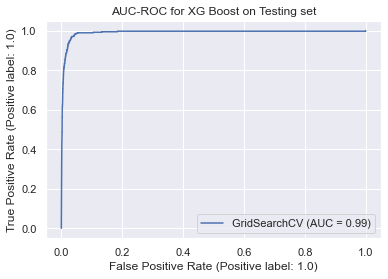

In [90]:
#Predicting on the test set using the best estimated model 
y_pred_test_smote = grid_search.predict(x_test)

#confusion matrix
conf_matrix_smote_test = confusion_matrix(y_test,y_pred_test_smote)
print(f"Confusion Matrix: \n {conf_matrix_smote_test}")

#test error
test_smote_score = grid_search.score(x_test,y_test)
print(f"Test Score : {test_smote_score}")

plot_roc_curve(grid_search,x_test,y_test)
plt.title("AUC-ROC for XG Boost on Testing set")
plt.show()

In [91]:
comparision_XGBoost.loc["SMOTE","Testing error"] = test_smote_score

comparision_XGBoost

Training error Testing error
Imbalanced XGBoost       0.900339      0.852533
SMOTE                    0.983744      0.990655

From the above table we can see that the SMOTE with XGBoost performs very well for both the train and the test data.

**6.6.3. Suppose we estimate the regression coefficients in a linear regression model by minimizing**

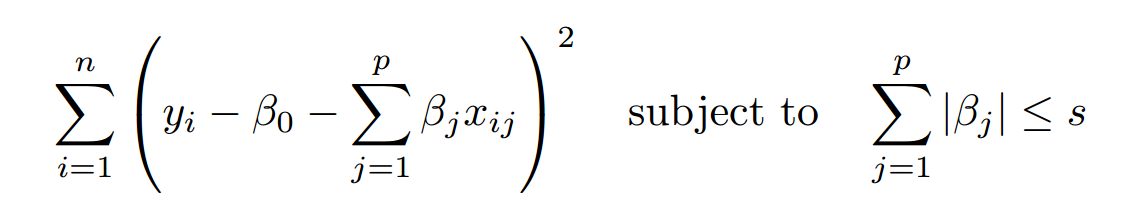

**for a particular value of s. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer**

**(a) As we increase s from 0, the training RSS will:<br>
    i. Increase initially, and then eventually start decreasing in an inverted U shape.<br>
    ii. Decrease initially, and then eventually start increasing in a U shape.<br>
    iii. Steadily increase.<br>
    iv. Steadily decrease.<br>
    v. Remain constant.<br>**
    
Ans:  Steadily decrese - ( As s increases , β decreases and the RSS reduces until the least square )

**(b) Repeat (a) for test RSS.<br>**

Ans:Decrease initially, and then eventually start increasing in a U shape - ( when s is zero, the β's are zeros and the test RSS is high. As s increases, β's get a non zero value and the test RSS also reduces. As, β's increase further they overfit to the training set and the RSS increases)

**(c) Repeat (a) for variance.<br>**

Ans:Steadily increase - (When s is zero the model has no variance. As s increases, the β values starts increasing. As the β values increases the variance also increases.

**(d) Repeat (a) for (squared) bias.<br>**

Ans: Stadily decrease - (When s is zero, the model predicts a constant and the bias is high. As s increases the β's also become non zero and fit to the training data and the bias decreases.

**(e) Repeat (a) for the irreducible error.**

Ans: Remains constant - (the irreducible error is independent of the model and therefore remains constant.)

**6.6.5. It is well-known that ridge regression tends to give similar coefficient
values to correlated variables, whereas the lasso may give quite different coefficient values to correlated variables. We will now explore
this property in a very simple setting.<br>
Suppose that n = 2, p = 2, x11 = x12, x21 = x22. Furthermore,
suppose that y1 +y2 = 0 and x11 +x21 = 0 and x12 +x22 = 0, so that
the estimate for the intercept in a least squares, ridge regression, or
lasso model is zero: βˆ0 = 0.**

**(a) Write out the ridge regression optimization problem in this setting.**

Ans: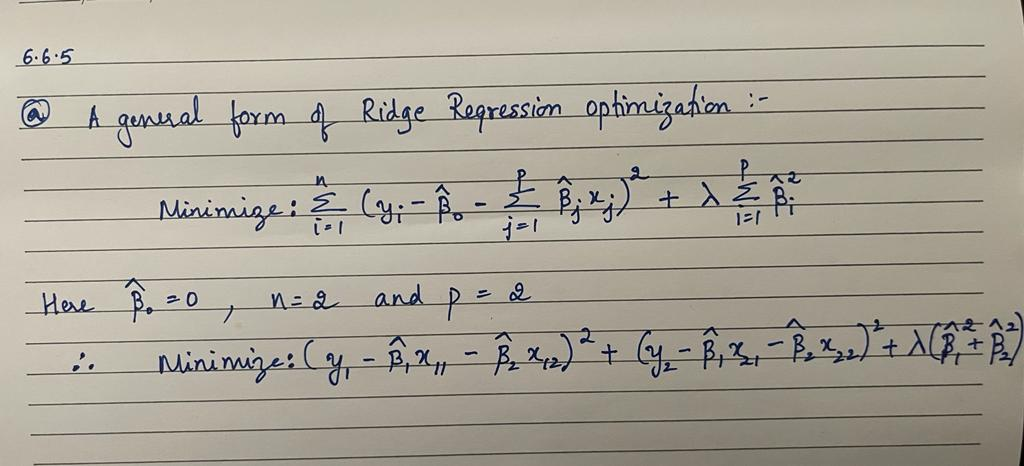

**(b) Argue that in this setting, the ridge coefficient estimates satisfy
βˆ1 = βˆ2.**

Ans: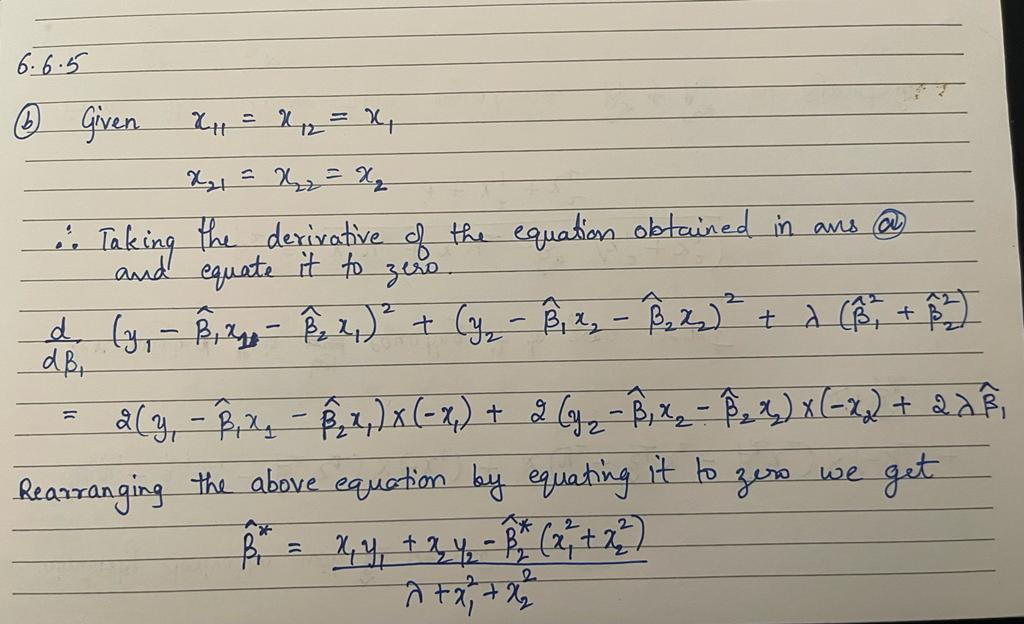

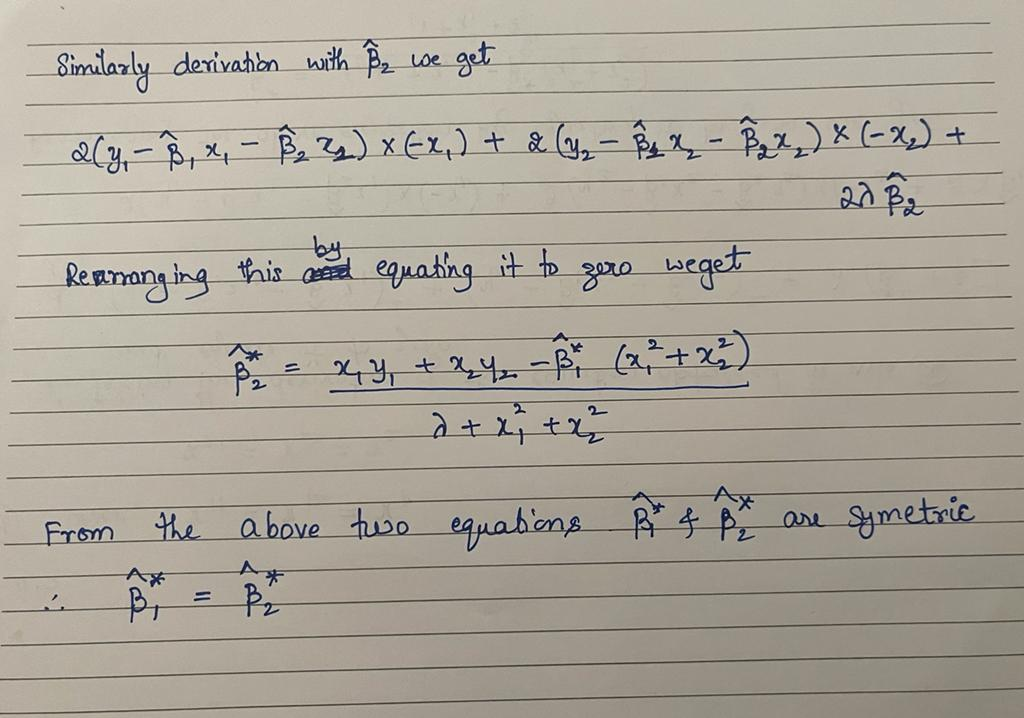

**(c) Write out the lasso optimization problem in this setting.**

Ans: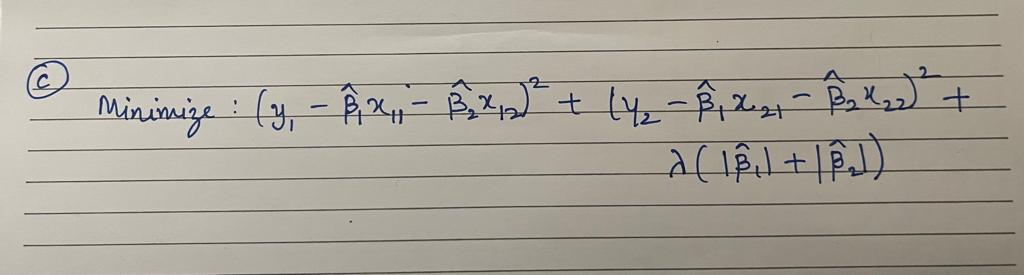

**(d) Argue that in this setting, the lasso coefficients βˆ1 and βˆ2 are
not unique—in other words, there are many possible solutions
to the optimization problem in (c). Describe these solutions.**

Ans: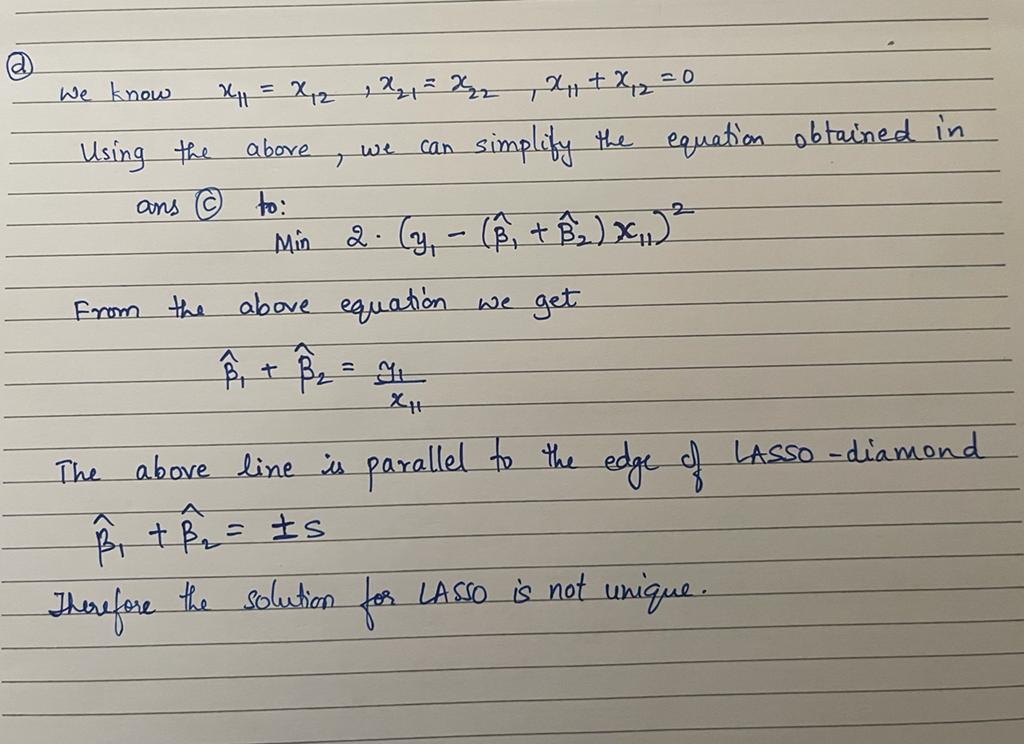

**8.4.5. Suppose we produce ten bootstrapped samples from a data set
containing red and green classes. We then apply a classification tree
to each bootstrapped sample and, for a specific value of X, produce
10 estimates of P(Class is Red|X):**

**0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.**

**There are two common ways to combine these results together into a
single class prediction. One is the majority vote approach discussed in
this chapter. The second approach is to classify based on the average
probability. In this example, what is the final classification under each
of these two approaches?**

Ans:  p = c(0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7,0.75)
<br><br>
**Majority voting for classification:**<br>
Count of P(Class is Red | X) < 0.5 = 4(which is green) and P(Class is Red | X) >= 0.5 = 6(which is red). So X is classified as red.
The red prediction is greater then green prediction so therefore classified as RED.

**Average probility:**
mean(p)
The average of the probebilities is 0.45 , therefore classified as GREEN

**9.7.3. Here we explore the maximal margin classifier on a toy data set.**

**(a) We are given n = 7 observations in p = 2 dimensions. For each
observation, there is an associated class label.**

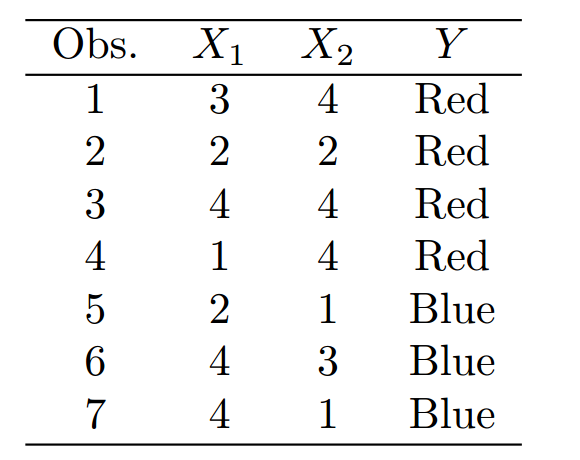

**Sketch the observations.**

Ans:
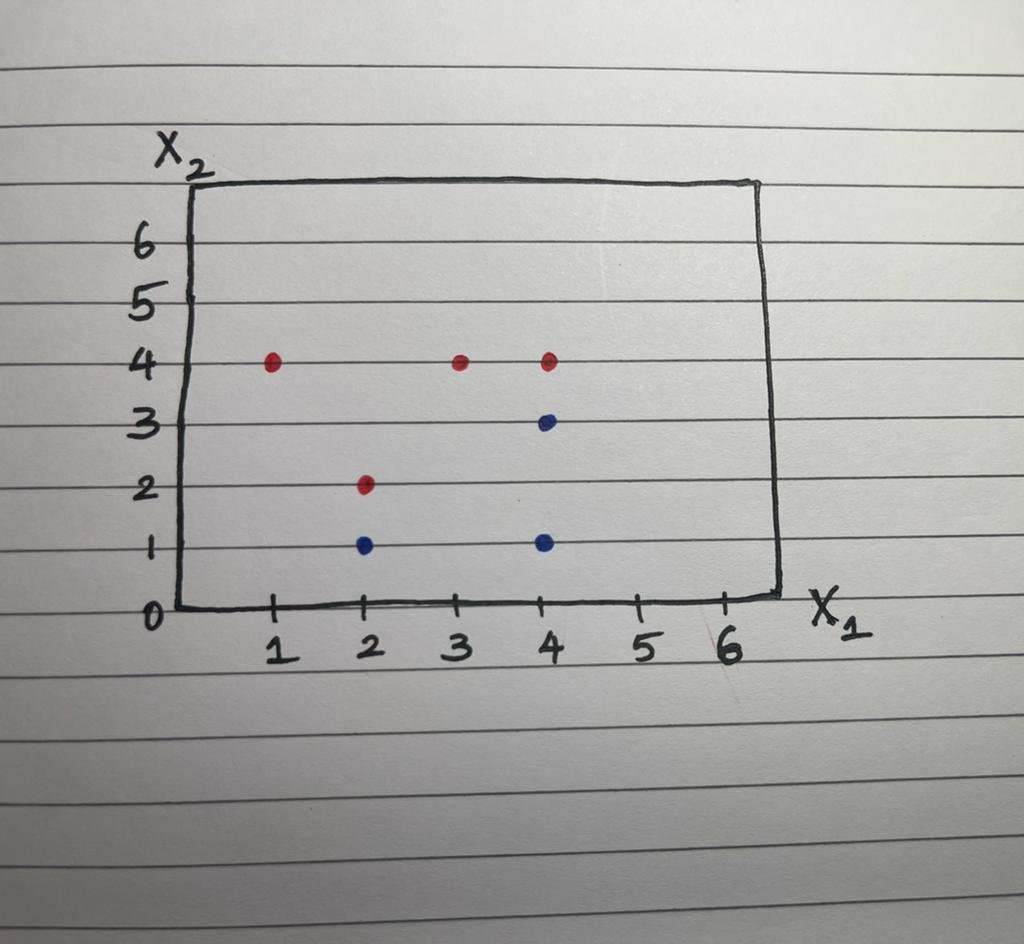

**(b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1)).**

Ans: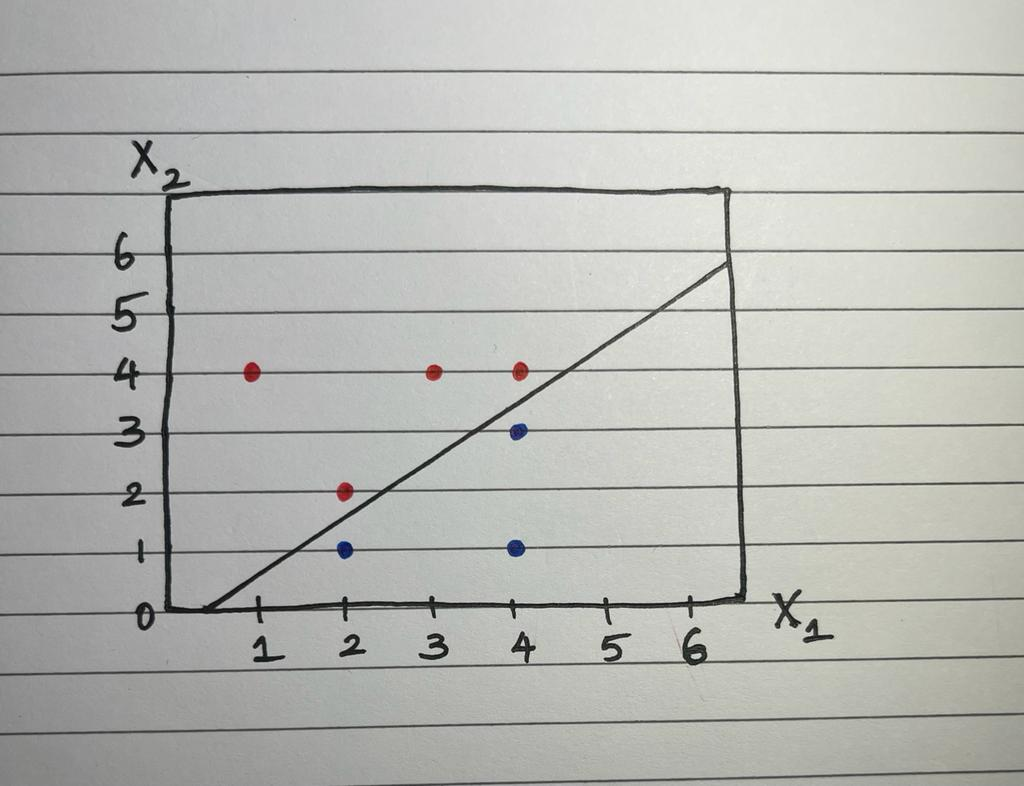

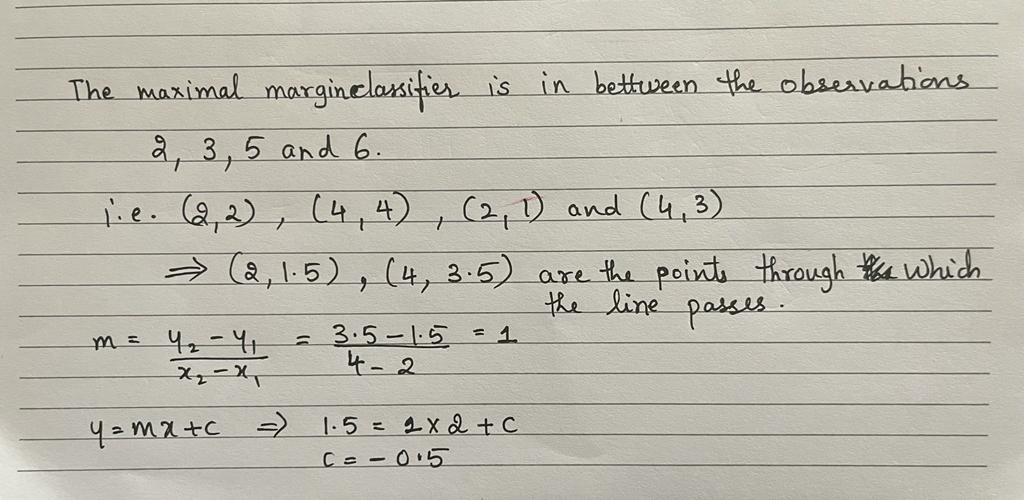

**(c) Describe the classification rule for the maximal margin classifier.
It should be something along the lines of “Classify to Red if
$β_0 + β_1X_1 + β_2X_2 > 0$, and classify to Blue otherwise.” Provide
the values for β0, β1, and β2.**

Ans: Classify to Red if
$0.5 - X_1 + X_2 <= 0$, otherwise classify to Blue.

**(d) On your sketch, indicate the margin for the maximal margin
hyperplane.**

Ans: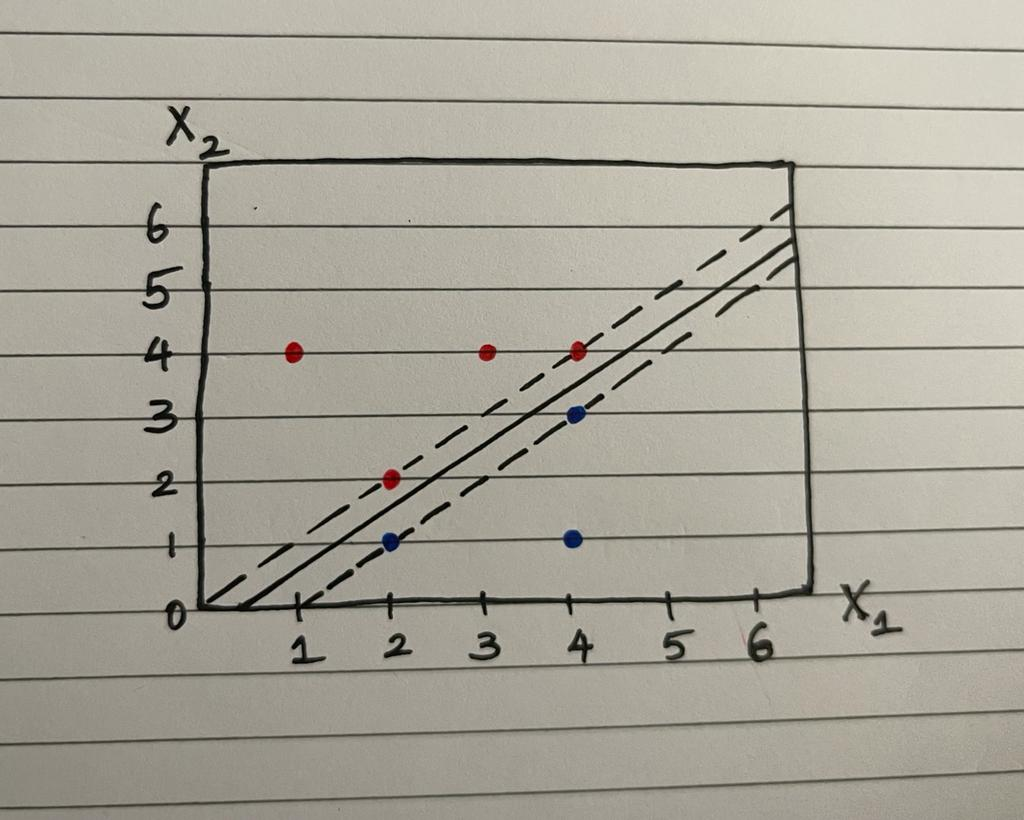

**(e) Indicate the support vectors for the maximal margin classifier.**

Ans: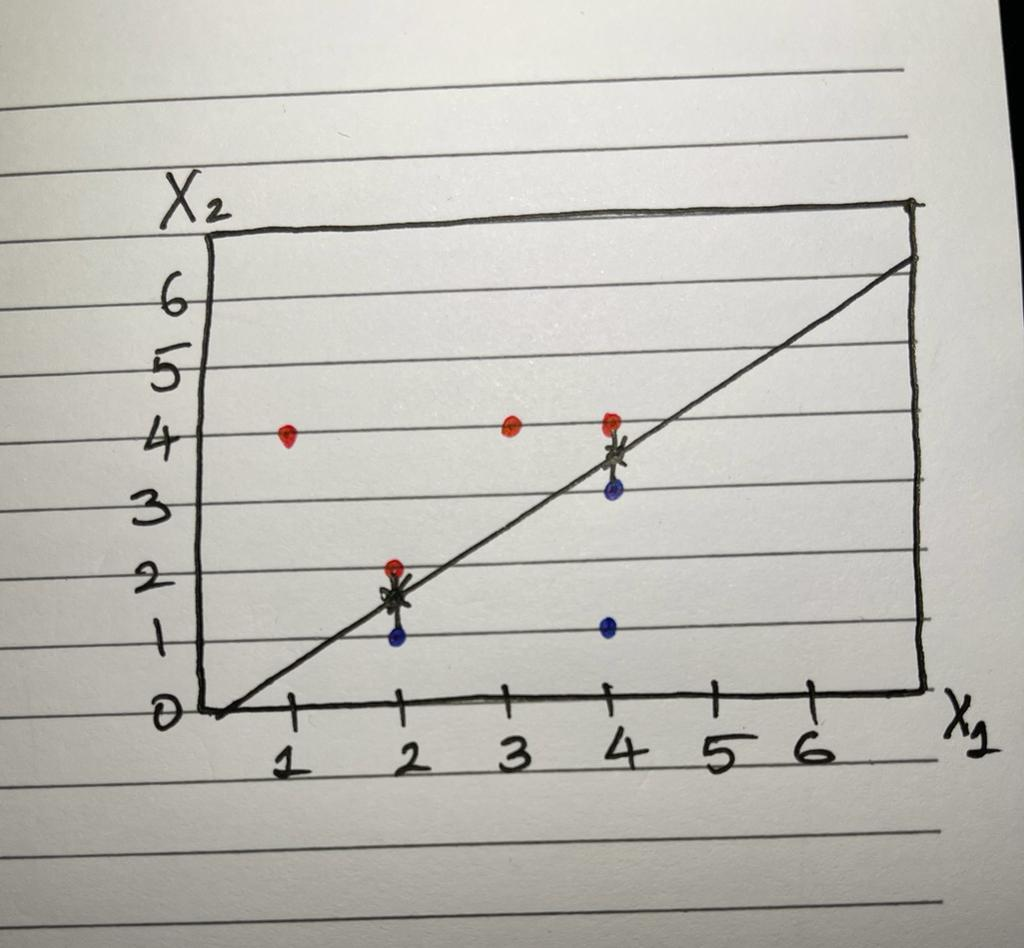

**(f) Argue that a slight movement of the seventh observation would
not affect the maximal margin hyperplane.**

Ans: Slight movement of the sevent observation (4,1) would not affect the margin hyperplane as it is outside the margin. 

**(g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.**

Ans: $−0.8−X_1+X_2>0$
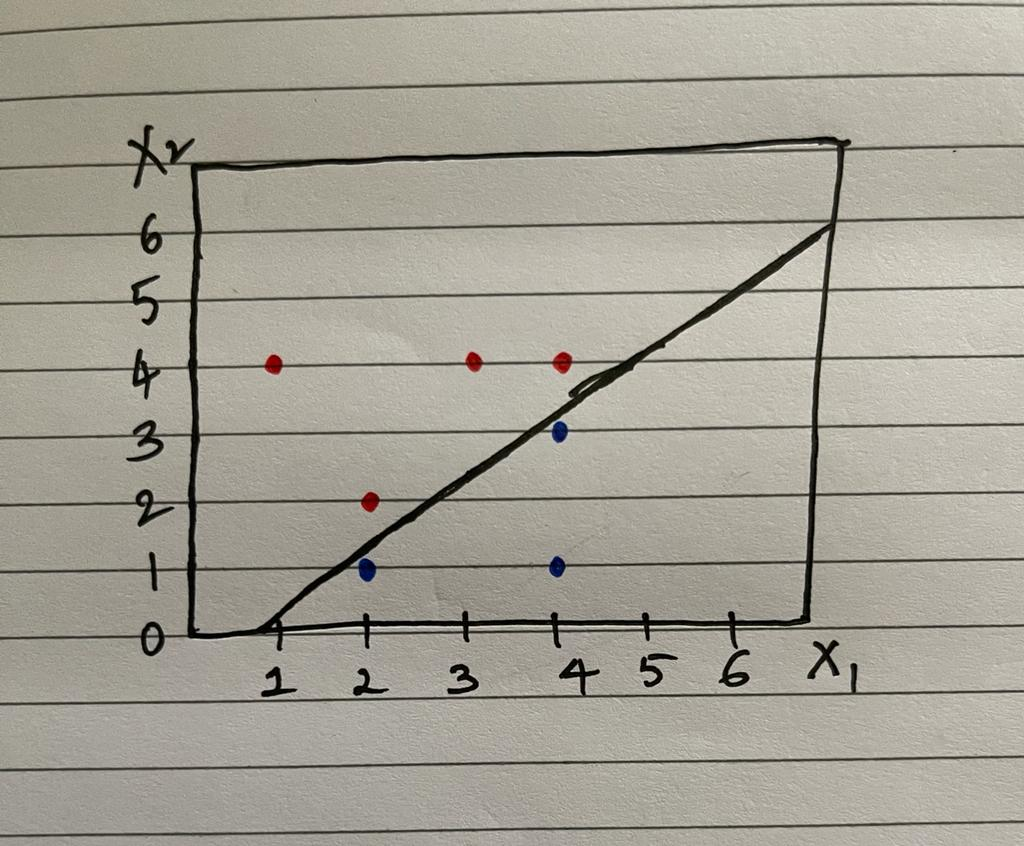

**(h) Draw an additional observation on the plot so that the two
classes are no longer separable by a hyperplane.**

Ans: Added a red point at (4,2)
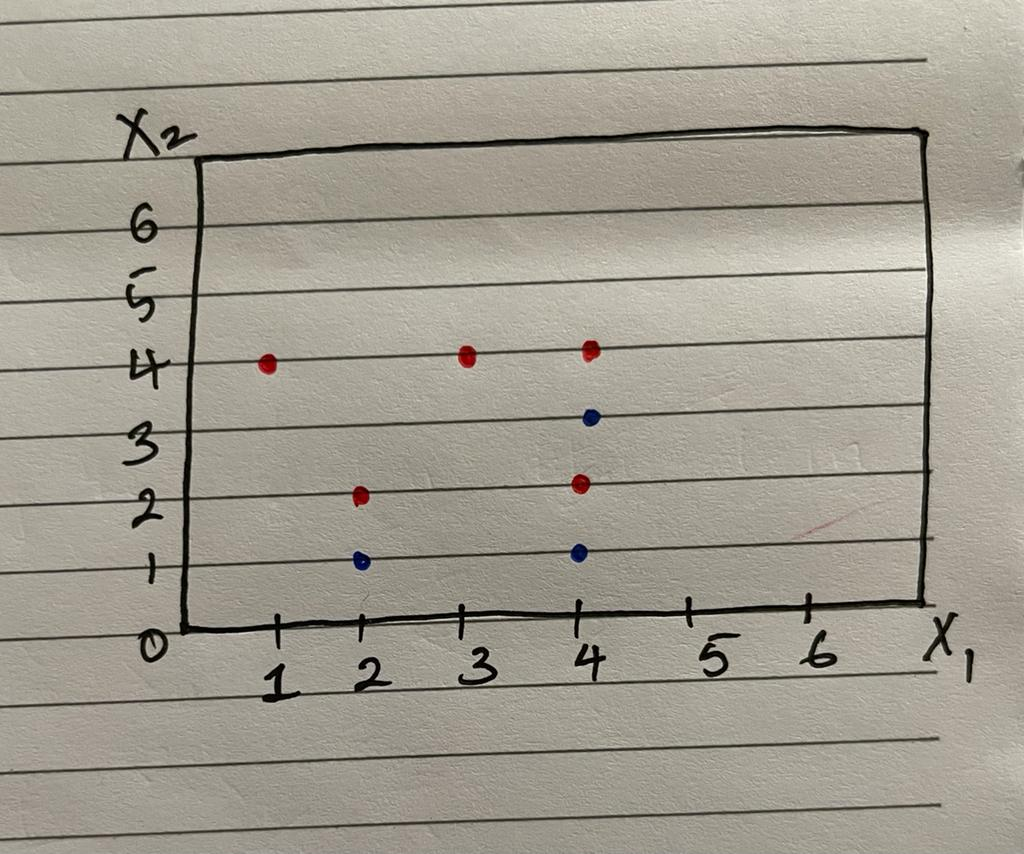